In [7]:
import os
for dirname, _, filenames in os.walk('./solution'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./solution\gender_submission.csv
./solution\test.csv
./solution\titanic_with_labels.csv
./solution\train.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [9]:
train_data = pd.read_csv('./solution/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data = pd.read_csv('./solution/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_drop_id = test_data.pop('PassengerId') #drop passangerId from test_data and assign it to a variable for later.
df = train_data.drop(['Survived', 'PassengerId'], axis=1) # drop the 'Survived', 'PassengerId' columns from train_data.
df = pd.concat([df, test_data], axis=0).reset_index(drop=True) #join the two dataframes so we can work with training and testing data at the same time

In [12]:
train_max = train_data.shape[0] #This will help us divide the dataframe back into training and testing sets later.
train_max

891

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


Text(0.5, 1.0, 'Train set')

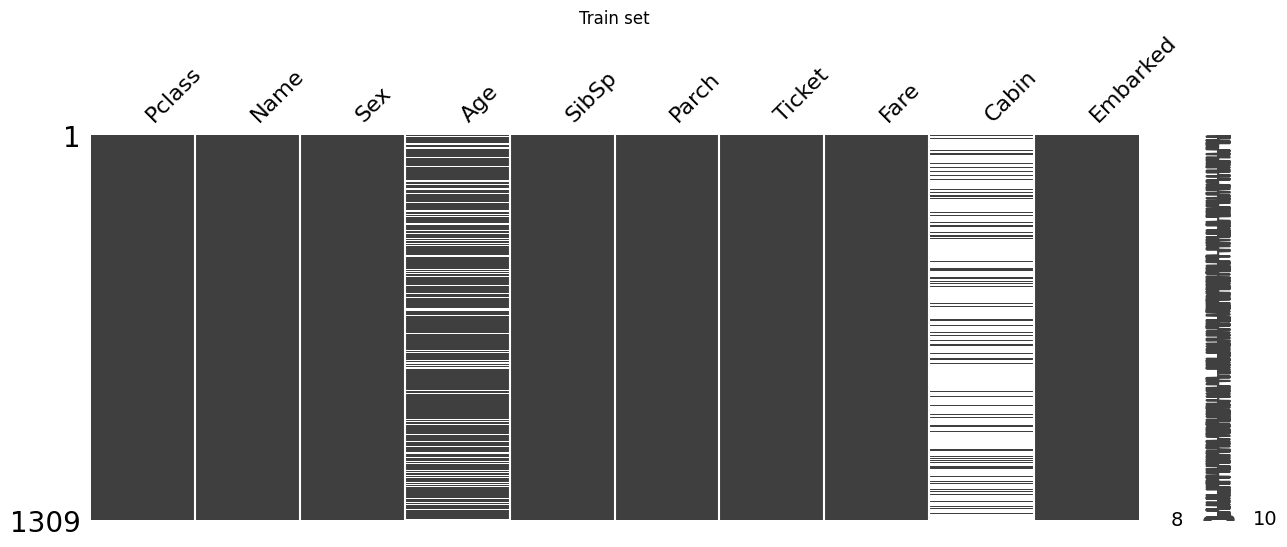

In [14]:
msno.matrix(df, figsize=(15,5)).set_title("Train set")

In [18]:
train_data['Survived'].sort_values()

0      0
519    0
521    0
522    0
524    0
      ..
546    1
215    1
216    1
218    1
445    1
Name: Survived, Length: 891, dtype: int64

In [19]:
df["Title"] = df["Name"].str.extract('([A-Za-z]+)\.',expand=False) #extract title

In [20]:
df['Title'].value_counts() #All titles

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [21]:
df['Surname'] = df['Name'].str.split(', ').str[0] #extract surname

In [22]:
df[df['Title'] == 'Master']['Age'].describe() #check age statistics for 'Master'

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

In [23]:
df[df['Title'] == 'Mr']['Age'].describe() #check age statistics for 'Mr'

count    581.000000
mean      32.252151
std       12.422089
min       11.000000
25%       23.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
df.loc[((df['Title'] == 'Mr') & (df['Age'] <= 17)), 'Title'] = 'Master'
df.loc[((df['Title'] == 'Master') & (df['Age'] > 17)), 'Title'] = 'Mr'

In [25]:
# Change Mlle and Mme to Miss and Mrs
df.loc[(df['Title'] == 'Mlle'), 'Title'] = 'Miss'  # Change title Mlle to Miss (there are only two people with this title and they are both 24 years old.)
df.loc[(df['Title'] == 'Mme'), 'Title'] = 'Mrs'   # Change title Mme to Mrs (there is only one person with this title and is also 24 years old.)

In [26]:
df[df['Title'] == 'Miss']['Age'].describe() #check age statistics for 'Miss'

count    212.000000
mean      21.795236
std       12.192794
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [27]:
df[df['Title'] == 'Mrs']['Age'].describe() #check age statistics for 'Mrs'

count    171.000000
mean      36.918129
std       12.902087
min       14.000000
25%       26.500000
50%       35.000000
75%       46.000000
max       76.000000
Name: Age, dtype: float64

In [28]:
df.loc[((df['Title'] == 'Mrs') & (df['Age'] <= 17)), 'Title'] = 'Miss'
df.loc[((df['Title'] == 'Miss') & (df['Age'] > 30)), 'Title'] = 'Ms'

In [29]:
titles = ['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Jonkheer']
df.loc[((df['Title'].isin(titles)) & (df['Sex'] == 'male')), 'Title'] = 'Mr'
df.loc[((df['Title'].isin(titles)) & (df['Sex'] == 'female')), 'Title'] = 'Mrs'

In [30]:
titles_royal = ['Countess', 'Sir', 'Lady', 'Don', 'Dona']
df.loc[((df['Title'].isin(titles_royal)) & (df['Sex'] == 'male')), 'Title'] = 'Mr'
df.loc[((df['Title'].isin(titles_royal)) & (df['Sex'] == 'female')), 'Title'] = 'Mrs'

In [31]:
df.loc[df['Age'] <= 17, 'Status'] = 'Child'
df.loc[df['Title'] == 'Master', 'Status'] = 'Child'
df.loc[((df['Sex'] == 'female') & (df['Parch'] > 0)), 'Status'] = 'Mother'
df.loc[((df['Sex'] == 'male') & (df['Parch'] > 0)), 'Status'] = 'Father'
df.loc[((df['Sex'] == 'female') & (df['Parch'] == 0)), 'Status'] = 'Woman'
df.loc[((df['Sex'] == 'male') & (df['Parch'] == 0)), 'Status'] = 'Man'

In [32]:
for i, a in enumerate(df['Age']):
    if pd.isna(a):
        df.loc[i, 'Age'] = df[df['Title'] == df.loc[i, 'Title']]['Age'].median()

In [33]:
df['Age'].isna().sum()

0

In [34]:
df['Ticket_ref'] = [i[0] if len(i) > 1 else 0 for i in df['Ticket'].str.split()] #split ticket to get the ticket reference
df['Ticket_number'] = [i[-1] for i in df['Ticket'].str.split()] #split ticket to get the ticket number

In [35]:
ticket_dict = df.groupby('Ticket_number')['Surname'].count().to_dict() #create dict grouped by people with the same ticket and surname
df['Same_ticket'] = df.Ticket_number.map(ticket_dict) # Number of people with the same ticket.


df['Price_pp'] = (df.Fare / df['Same_ticket']).round(1) # Price payed per person

In [36]:
df['Cabin_ltr'] = df['Cabin'].str[0] # get cabin leters

In [37]:
df['Cabin_ltr'].isna().sum()

1014

In [38]:
def cabin_na(dataframe, feature):
    tickets = dataframe[(dataframe['Same_ticket'] > 1) & (~dataframe['Cabin_ltr'].isna())][feature].unique() #Select the tickets that have more than one entry
    cabin_ticket = dataframe[dataframe[feature].isin(tickets)][[feature, 'Cabin_ltr']] #dataframe of the tickets with more than one entry and their designated cabin letter
    cabin_ticket.dropna(inplace=True)
    
#map the two columns in cabin_ticket into a dictionary
    c = cabin_ticket[feature].to_list()
    b = cabin_ticket['Cabin_ltr'].to_list()
    map = {c[i]: b[i] for i in range(len(c))}

    for i, ticket_n in enumerate(dataframe[feature]): #iterate through all the tickets
        for ticket, cabin in map.items(): #iterate through the tickets that have more than one entry
            if ticket_n == ticket: # check if the ticket we selected in the fist instance corresponds to the list of tickets with more than one entry
                dataframe.loc[i, 'Cabin_ltr'] = cabin #replace the value of cabin_ltr(nan) with the value of the cabin designated in the map dict for that ticket number.

In [39]:
cabin_na(df, 'Ticket_number')

In [40]:
df['Cabin_ltr'].isna().sum()

997

In [41]:
df.groupby(['Pclass', 'Cabin_ltr']).Price_pp.describe()

count       mean        std   min   25%    50%     75%   
Pclass Cabin_ltr                                                           
1      A           24.0  30.991667   9.459015   0.0  27.3  29.85  34.900  \
       B           69.0  40.618841  26.883005   0.0  28.8  35.50  45.500   
       C          103.0  35.928155   9.765590  25.3  27.7  33.90  43.050   
       D           40.0  30.025000   5.730295  19.7  26.0  26.60  37.600   
       E           33.0  26.633333   4.135492  13.1  26.6  26.90  27.700   
       T            1.0  35.500000        NaN  35.5  35.5  35.50  35.500   
2      D            6.0  13.600000   0.812404  12.9  13.0  13.40  13.875   
       E            5.0   9.260000   3.819424   5.2   5.2  10.50  12.400   
       F           13.0  10.446154   1.591443   8.7   9.8   9.80  10.500   
3      E            3.0   6.800000   1.039230   6.2   6.2   6.20   7.100   
       F           10.0   7.510000   0.185293   7.2   7.5   7.55   7.600   
       G            5.0   5.440000   0.219089   5.2   5.2   5.60   5.600   

                    max  
Pclass Cabin_ltr         
1      A           50.5  
       B          128.1  
       C           68.4  
       D           39.1  
       E           38.5  
       T           35.5  
2      D           15.0  
       E           13.0  
       F           13.0  
3      E            8.0  
       F            7.8  
       G            5.6

In [42]:
df[(df['Pclass'] == 1) & (df['Cabin_ltr'] == 'A')]['Price_pp'].sort_values()

806      0.0
110     26.0
475     26.0
284     26.0
1265    27.3
445     27.3
1184    27.3
1099    27.7
309     28.5
599     28.5
937     29.7
1222    29.7
630     30.0
919     30.5
174     30.7
209     31.0
1003    31.7
96      34.7
23      35.5
647     35.5
556     39.6
583     40.1
185     50.0
867     50.5
Name: Price_pp, dtype: float64

In [43]:
# The minimum value payed of 0 is an outliner. We will replace it with the second lowest value of 26.
df.loc[((df['Cabin_ltr'] == 'A') & (df['Price_pp'] == 0)), 'Price_pp'] = 26

In [44]:
df[(df['Pclass'] == 1) & (df['Cabin_ltr'] == 'B')]['Price_pp'].sort_values(ascending=True).head(10)

815      0.0
1263     0.0
263      0.0
872      5.0
572      8.8
690     19.0
781     19.0
1281    23.4
1199    23.4
520     23.4
Name: Price_pp, dtype: float64

In [45]:
df.loc[((df['Cabin_ltr'] == 'B') & (df['Price_pp'] < 19)), 'Price_pp'] = 19 #outlier reduction
df.loc[((df['Cabin_ltr'] == 'B') & (df['Price_pp'] >= 82.5)), 'Price_pp'] = 82.5 #outlier reduction

In [46]:
df['Price_pp'].isna().sum()

1

In [47]:
for index, price in enumerate(df['Price_pp']): #find the value's index
    if pd.isna(price):
        print(index)

1043


In [48]:
df.iloc[1043]

Pclass                            3
Name             Storey, Mr. Thomas
Sex                            male
Age                            60.5
SibSp                             0
Parch                             0
Ticket                         3701
Fare                            NaN
Cabin                           NaN
Embarked                          S
Title                            Mr
Surname                      Storey
Status                          Man
Ticket_ref                        0
Ticket_number                  3701
Same_ticket                       1
Price_pp                        NaN
Cabin_ltr                       NaN
Name: 1043, dtype: object

In [49]:
df.loc[1043, 'Price_pp'] = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Price_pp'].mean().round(1) #replace the missing value with the mean price_pp based on Plcass and Embarked

In [50]:
df[df['Cabin_ltr'].isna()].groupby('Pclass')['Price_pp'].describe() #look for the price_pp statistics in the different classes where cabin is NaN.

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,53.0,28.837736,12.034266,0.0,26.0,26.6,30.7,66.8
2,253.0,11.411858,2.696400,0.0,10.5,12.5,13.0,16.0
3,691.0,7.314327,1.512962,0.0,7.1,7.8,7.9,20.0


In [51]:
df.loc[((df['Cabin_ltr'].isna()) & (df['Pclass'] == 1) & (df['Price_pp'] < 9)), 'Price_pp'] = 9 #remove price outliers from cabin NaN based on Pclass
df.loc[((df['Cabin_ltr'].isna()) & (df['Pclass'] == 2) & (df['Price_pp'] < 9)), 'Price_pp'] = 5 #remove price outliers from cabin NaN based on Pclass

In [52]:
class_price = {
    1: {'A': [26, 35], 'B': [45, 83], 'C': [35, 45], 'D': [19, 26], 'E': [9, 19], 'T': [35, 36]},
    2: {'D': [12, 17], 'E': [8, 12], 'F': [5, 8]},
    3: {'E': [6, 9], 'F': [9, 21], 'G': [0, 6]},
}

In [53]:
def cabin_class(dataframe): #replace cabin letter NaNs based on Price_pp and Pclass
    for i, row in dataframe.loc[dataframe['Cabin_ltr'].isna(), ['Pclass', 'Price_pp']].iterrows():
        for a, b in class_price.items():
            if row['Pclass'] == a:
                for c, d in b.items():
                    if max(d) > row['Price_pp'] >= min(d):
                        dataframe.loc[i, 'Cabin_ltr'] = c
                        
    deck_level = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7, 'T' : 7} #create a map for the letters. T only has one passenger and the Price values are similar to A so they will be aggregated.

    dataframe['Cabin_ltr'] = dataframe['Cabin_ltr'].replace(deck_level)

In [54]:
cabin_class(df)

In [55]:
df['Cabin_ltr'].isna().sum()

0

In [56]:
for i, a in enumerate(df['Age']):
    if pd.isna(a):
        df.loc[i, 'Age'] = df[df['Title'] == df.loc[i, 'Title']]['Age'].median()

In [57]:
df['Age'].isna().sum()

0

80.0
0.42


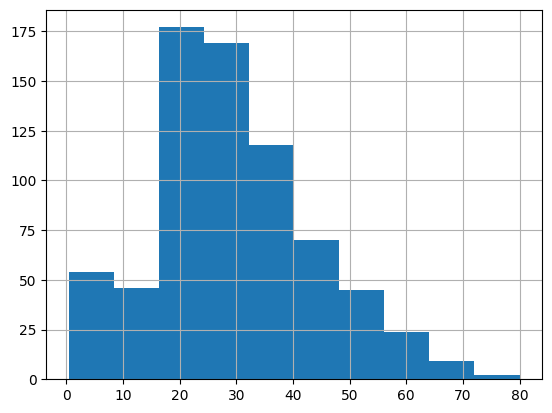

In [58]:
train_data['Age'].hist()
print(train_data['Age'].max())
print(train_data['Age'].min())

In [59]:
y = train_data['Survived']
X = df[:train_max].copy()
test_df = df[train_max:].copy()
full_df = pd.concat([X, y], axis=1).copy() #join x_train values with Survived column for graph plotting.

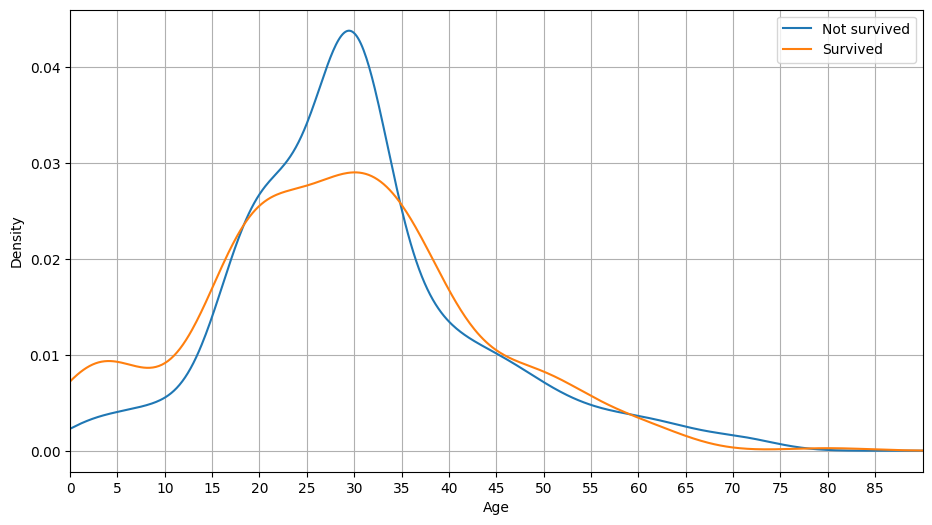

In [60]:
plt.figure(figsize=(11, 6))
full_df[full_df['Survived'] == 0]['Age'].plot(kind='kde', label = 'Not survived')
full_df[full_df['Survived'] == 1]['Age'].plot(kind='kde', label = 'Survived')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.xlim(0, 90)
plt.xticks(np.arange(0, 90, 5))
plt.show()

In [61]:
age_df = train_data['Age']
for i, a in enumerate(train_data['Age']):
    if a <= 17:
        age_df.loc[i] = 4
    elif a > 17 and a <= 35:
        age_df.loc[i] = 2
    elif a > 35 and a <= 57:
        age_df.loc[i] = 3
    else:
        age_df.loc[i] = 1

C:\Users\judai\AppData\Local\Temp\ipykernel_26436\3906578948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.loc[i] = 2
C:\Users\judai\AppData\Local\Temp\ipykernel_26436\3906578948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.loc[i] = 3
C:\Users\judai\AppData\Local\Temp\ipykernel_26436\3906578948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.loc[i] = 2
C:\Users\judai\AppData\Local\Temp\ipykernel_26

In [62]:
df['Age_group'] = age_df

In [63]:
df['single_vs_family'] = df['SibSp'] + df['Parch'] + 1
full_df['single_vs_family'] = df['SibSp'] + df['Parch'] + 1

In [64]:
df['single_vs_family'].value_counts() #family sizes

single_vs_family
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

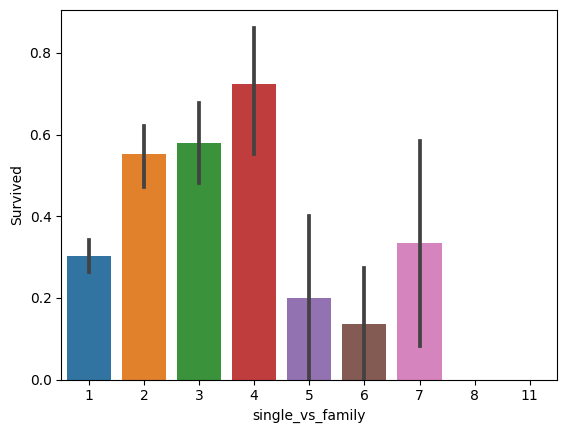

In [65]:
sns.barplot(x='single_vs_family', y='Survived', data=full_df)
plt.show()

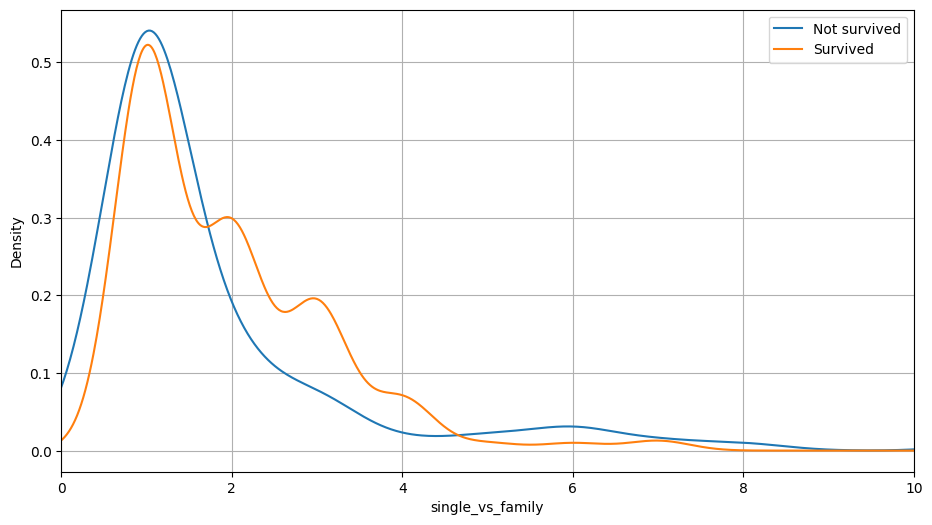

In [66]:
plt.figure(figsize=(11, 6))
full_df[full_df['Survived'] == 0]['single_vs_family'].plot(kind='kde', label = 'Not survived')
full_df[full_df['Survived'] == 1]['single_vs_family'].plot(kind='kde', label = 'Survived')
plt.legend()
plt.grid()
plt.xlabel('single_vs_family')
plt.xlim(0, 10)
plt.show()

In [67]:
df['Sf_group'] = pd.cut(x=df.single_vs_family, labels=[1, 3, 2], 
                            bins=[-1, 1.8, 4, df.single_vs_family.max()]).astype('float') #Code and feature modified from https://www.kaggle.com/code/eu1234/titanic-81-57-leaderboard-top-1-no-cheating

In [68]:
family_survivers = full_df[['Surname', 'Survived']].groupby('Surname').mean().round(2).reset_index() #Code and feature modified from https://www.kaggle.com/code/eu1234/titanic-81-57-leaderboard-top-1-no-cheating

In [69]:
family_survivers.groupby(['Surname', 'Survived']).mean().sort_values('Survived', ascending=False)[:10]

,
Surname,Survived
Lehmann,1.0
Glynn,1.0
Hedman,1.0
Healy,1.0
Hays,1.0
Hawksford,1.0
Hassab,1.0
Ryerson,1.0
Saalfeld,1.0


In [70]:
family_survivers_dict = dict(zip(family_survivers.Surname, family_survivers.Survived)) #Code modified from https://www.kaggle.com/code/eu1234/titanic-81-57-leaderboard-top-1-no-cheating


common_survivers = {}
for surname, survived in family_survivers_dict.items():
    if surname in list(test_df['Surname'].unique()):
        common_survivers[surname] = survived

df['Family_survivers'] = df.Surname.map(common_survivers)
df.Family_survivers = df.Family_survivers.fillna(df.Family_survivers.mean())

In [71]:
 full_df['Family_survivers'] = df['Family_survivers']

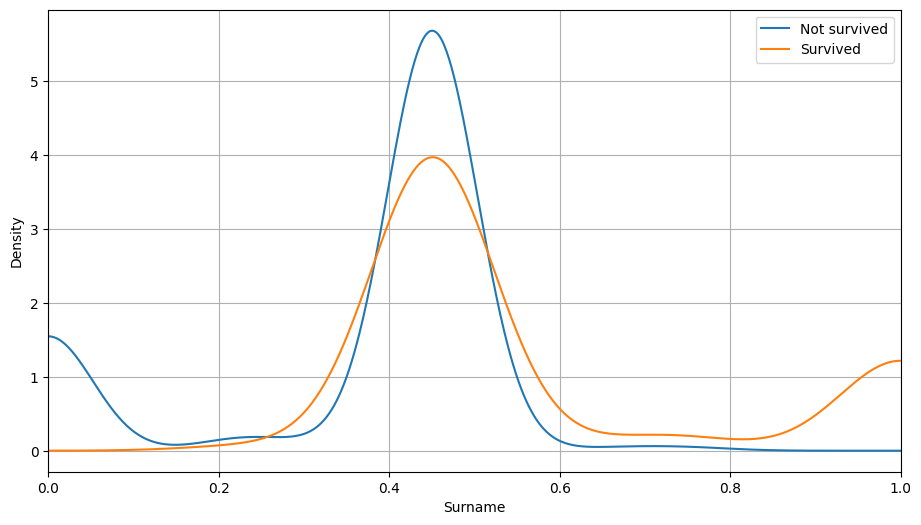

In [72]:
plt.figure(figsize=(11, 6))
full_df[full_df['Survived'] == 0]['Family_survivers'].plot(kind='kde', label = 'Not survived')
full_df[full_df['Survived'] == 1]['Family_survivers'].plot(kind='kde', label = 'Survived')
plt.legend()
plt.grid()
plt.xlabel('Surname')
plt.xlim(0, 1)
# plt.xticks(np.arange(0, 90, 5))
plt.show()

In [73]:
df['Lucky_family'] = pd.cut(x=full_df.Family_survivers, labels=[2, 3, 1, 4],
                            bins=[-1, 0.22, 0.35, 0.49, full_df.Family_survivers.max()]).astype('float')

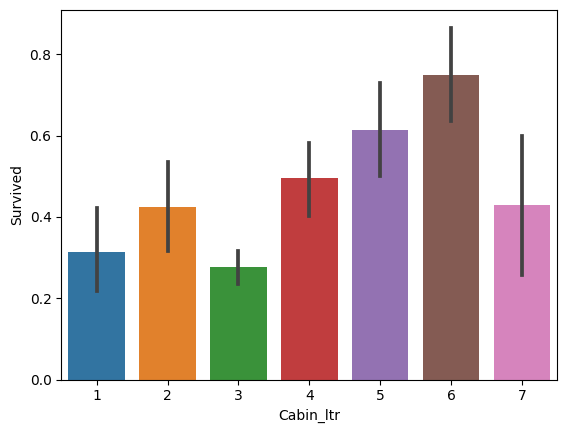

In [74]:
sns.barplot(x='Cabin_ltr', y='Survived', data=full_df)
plt.show()

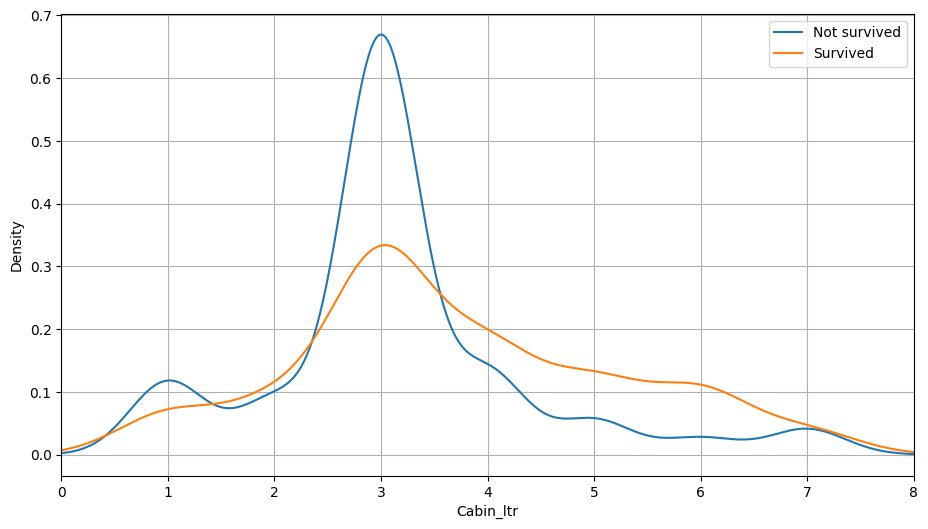

In [75]:
plt.figure(figsize=(11, 6))
full_df[full_df['Survived'] == 0]['Cabin_ltr'].plot(kind='kde', label = 'Not survived')
full_df[full_df['Survived'] == 1]['Cabin_ltr'].plot(kind='kde', label = 'Survived')
plt.legend()
plt.grid()
plt.xlabel('Cabin_ltr')
plt.xlim(0, 8)
# plt.xticks(np.arange(0, 90, 5))
plt.show()

In [76]:
df['Cabin_survival'] = pd.cut(x=full_df.Cabin_ltr, labels=[2, 3, 1, 4],
                            bins=[0.4, 1.5, 2.4, 3.5, full_df.Cabin_ltr.max()]).astype('float')

In [77]:
df.Price_pp = df.Price_pp.apply(np.log1p) #normalise price

In [78]:
df.dtypes

Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Title                object
Surname              object
Status               object
Ticket_ref           object
Ticket_number        object
Same_ticket           int64
Price_pp            float64
Cabin_ltr             int64
Age_group           float64
single_vs_family      int64
Sf_group            float64
Family_survivers    float64
Lucky_family        float64
Cabin_survival      float64
dtype: object

In [79]:
df['Pclass'] = df['Pclass'].astype(object) #Pclass should be object instead of int64

In [80]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numericals = list(df.select_dtypes([np.number]).columns)
itimp = IterativeImputer()
num_var = pd.DataFrame(itimp.fit_transform(df[numericals]), #clear all remaining NaNs.
                      columns=df[numericals].columns)

In [81]:
cat_var = pd.DataFrame(df[['Pclass', 'Sex', 'Embarked', 'Title', 'Status']]) #categorical variables
to_drop = pd.DataFrame(df[['Family_survivers']]) #variables to drop

In [82]:
cat_var = pd.get_dummies(cat_var) #create dummies for categoricals

In [83]:
df = pd.concat([cat_var, num_var], axis=1)
df = df.drop(to_drop, axis=1) #drop variables not needed

In [84]:
X_train = df[:train_max].copy() #create train and test datasets for modeling
X_test = df[train_max:].copy()

In [85]:
y_train = train_data['Survived'] #target

In [86]:
X_test.head()
X_test.isna().sum()

Pclass_1            0
Pclass_2            0
Pclass_3            0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Ms            0
Status_Father       0
Status_Man          0
Status_Mother       0
Status_Woman        0
Age                 0
SibSp               0
Parch               0
Fare                0
Same_ticket         0
Price_pp            0
Cabin_ltr           0
Age_group           0
single_vs_family    0
Sf_group            0
Lucky_family        0
Cabin_survival      0
dtype: int64

In [87]:
X_train.isna().sum()

Pclass_1            0
Pclass_2            0
Pclass_3            0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Ms            0
Status_Father       0
Status_Man          0
Status_Mother       0
Status_Woman        0
Age                 0
SibSp               0
Parch               0
Fare                0
Same_ticket         0
Price_pp            0
Cabin_ltr           0
Age_group           0
single_vs_family    0
Sf_group            0
Lucky_family        0
Cabin_survival      0
dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

k_fold = KFold(n_splits = 9, shuffle=True, random_state = 0)

In [89]:
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]

knn = KNeighborsClassifier(n_neighbors = 13)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=13)
gnb = GaussianNB()
svc = SVC()
gbc = GradientBoostingClassifier()
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

score_list = []
score_name = []

for scl in scl_list:
    scl.fit(X_train)
    X_train = scl.transform(X_train)
    X_test = scl.transform(X_test)
    for clf in clf_list:
        scoring = "accuracy"
        score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(scl)+":"+str(clf))
        score = round(np.mean(score)*100,2)
        score_list.append(score)   

In [90]:
for index, score in enumerate(score_list):
    if score > 82:
        print(index, score)

4 82.6
5 85.07
10 82.94
11 85.07
16 82.94
17 85.07
22 82.49
23 85.07


In [91]:
score_name[8]

'MinMaxScaler():RandomForestClassifier(n_estimators=13)'

In [92]:
scl = MinMaxScaler()
scl.fit(X_train)
scl.transform(X_train)
scl.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3)
rfc = RandomForestClassifier()

parameters = { 
    'n_estimators': [400, 450, 500],
    'max_features': ['log2'],
    'max_depth' : [6],
    'criterion' :['gini']
}

gs = GridSearchCV(rfc, scoring='accuracy', param_grid = parameters, cv=cv, verbose=1)
gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
params = gs.best_params_
print(params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.8731762065095399
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 400}


In [93]:
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=400)

In [94]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_drop_id, 'Survived': predictions})

In [95]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
